In [3]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
digits = load_digits()
X = digits.data
Y = digits.target.reshape(1797,1)
print("Feature's dimension is: {}".format(X.shape))
print("Target's dimension is: {}".format(Y.shape))

Feature's dimension is: (1797, 64)
Target's dimension is: (1797, 1)


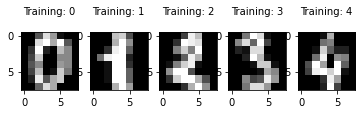

In [39]:
for index, (image, label) in enumerate(zip(X[0:5],Y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' %label , fontsize = 10)

In [40]:
print(zip(X[20:25],Y[20:25]))
a = zip(X[0:5],Y[0:5])
# print(list(a))
# print(list(a[1]))
# print(Y)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()

In [53]:
logreg.fit(x_train, y_train)

/home/mehran/Envs/venv0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
logreg.predict(x_test[0].reshape(1,-1))
print(y_test[0])

2


In [56]:
predictions = logreg.predict(x_test)

In [58]:
score = logreg.score(x_test, y_test)
print(score)

0.9511111111111111


In [60]:
import seaborn as sns 
from sklearn import metrics

In [62]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy Score: 0.9511111111111111')

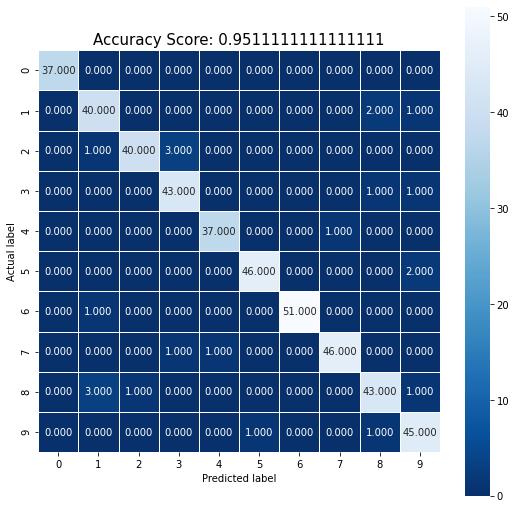

In [65]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidth = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)